In [1]:
import numpy as np
import pandas as pd
import json
from epilepsypcm.utils.outcome_params import node_location

all_positive_patients = pd.read_csv("newDF.csv", sep = ',').reset_index(drop = True)

In [2]:
print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()


0.0    268
1.0     41
Name: outcome, dtype: int64


,Unnamed: 0,Channels,outcome,SigResp,SigStim,N1RespAvg,N1RespSDV,N2RespAvg,N2RespSDV,P2RespAvg,P2RespSDV,N1StimAvg,N1StimSDV,N2StimAvg,N2StimSDV,P2StimAvg,P2StimSDV
0,0,LA9_LA10,0.0,0.000000,0.250000,1.530459,1.134169,2.040546,1.369091,1.304096,0.892887,7.178516,10.790559,6.536859,6.383906,5.785279,7.331337
1,1,LAH1_LAH2,1.0,0.076923,0.250000,7.062089,20.678040,3.320937,2.795194,2.178348,2.563587,7.883750,16.334814,4.921208,3.029861,2.352152,1.803711
2,2,LAH8_LAH9,0.0,0.307692,0.125000,4.032683,2.995624,3.450575,2.883998,2.376435,2.139730,2.505806,2.164878,2.190308,1.489418,2.033410,2.112725
3,3,LPH1_LPH2,0.0,0.115385,0.333333,6.522655,17.219698,3.369771,3.506524,2.281413,3.303814,6.505212,8.264811,4.630948,3.574869,4.187831,3.626223
4,4,LPH7_LPH8,0.0,0.307692,0.083333,7.304854,10.728727,4.610356,4.159990,3.468193,2.645476,2.823084,2.925869,1.606341,1.075715,1.461462,1.012732


In [3]:
from epilepsypcm.utils.make_df import make_df, get_df_list, concat_dfs
from epilepsypcm.models.base_models import *
from sklearn.metrics import auc

# Plotting everything for RF

Random Forest - Number of mislabeled points out of a total 78 points : 10
Random Forest - Number of mislabeled points out of a total 78 points : 11
Random Forest - Number of mislabeled points out of a total 78 points : 10
0.0    259
1.0     41
Name: outcome, dtype: int64
Random Forest - Number of mislabeled points out of a total 75 points : 9
Random Forest - Number of mislabeled points out of a total 75 points : 15
Random Forest - Number of mislabeled points out of a total 75 points : 13


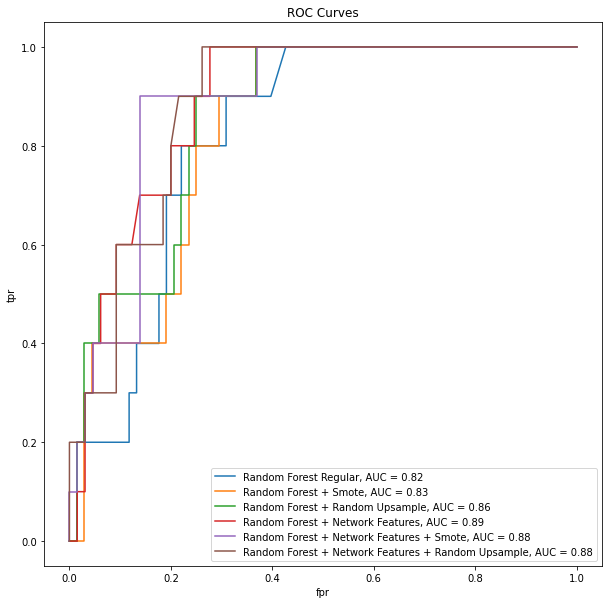

In [4]:
all_positive_patients = pd.read_csv("newDF.csv", sep = ',').reset_index(drop = True)

X_list = ["Channels","SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

# REGULAR FEATURES

#random forest regular
smote = False
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest Regular, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest SMOTE
smote = True
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Smote, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


#random forest random upsample
smote = "resample"
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Random Upsample, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


# REGULAR FEATURES + NETWORK FEATURES

all_positive_patients = pd.read_csv("networkfeaturesfixed.csv", sep = ',').reset_index(drop = True)

print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()

X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV", "EV", "Closeness"]

#random forest with network features
smote = False
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest with network features SMOTE
smote = True
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features + Smote, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


#random forest with network features random upsample
smote = "resample"
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features + Random Upsample, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


Random Forest - Number of mislabeled points out of a total 78 points : 10
Random Forest - Number of mislabeled points out of a total 78 points : 12
Random Forest - Number of mislabeled points out of a total 78 points : 9
0.0    259
1.0     41
Name: outcome, dtype: int64
Random Forest - Number of mislabeled points out of a total 75 points : 9
Random Forest - Number of mislabeled points out of a total 75 points : 13
Random Forest - Number of mislabeled points out of a total 75 points : 11


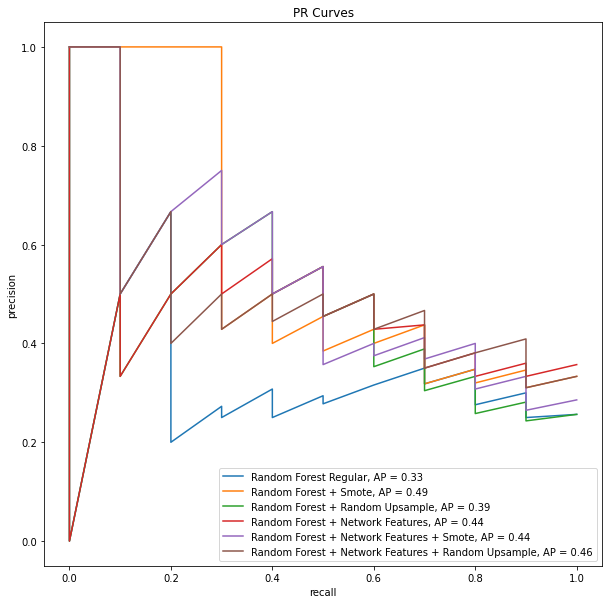

In [5]:
all_positive_patients = pd.read_csv("newDF.csv", sep = ',').reset_index(drop = True)

X_list = ["Channels","SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

# REGULAR FEATURES

#random forest regular
smote = False
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest Regular, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + smote
smote = True
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Smote, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + random upsample
smote = "resample"
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Random Upsample, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')



# REGULAR FEATURES + NETWORK FEATURES

all_positive_patients = pd.read_csv("networkfeaturesfixed.csv", sep = ',').reset_index(drop = True)

print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()

X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV", "EV", "Closeness"]

#random forest + network features
smote = False
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + network features + smote
smote = True
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features + Smote, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + network features + random upsample
smote = "resample"
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features + Random Upsample, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

## Results with stim + response channels

In [6]:
all_positive_patients = pd.read_csv("newDF.csv", sep = ',').reset_index(drop = True)

X_list = ["Channels","SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, U

Logistic Regression - Number of mislabeled points out of a total 78 points : 10
Naive Bayes - Number of mislabeled points out of a total 78 points : 32
Random Forest - Number of mislabeled points out of a total 78 points : 10
[14:18:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 10
Adaboost - Number of mislabeled points out of a total 78 points : 6
SVM - Number of mislabeled points out of a total 78 points : 10


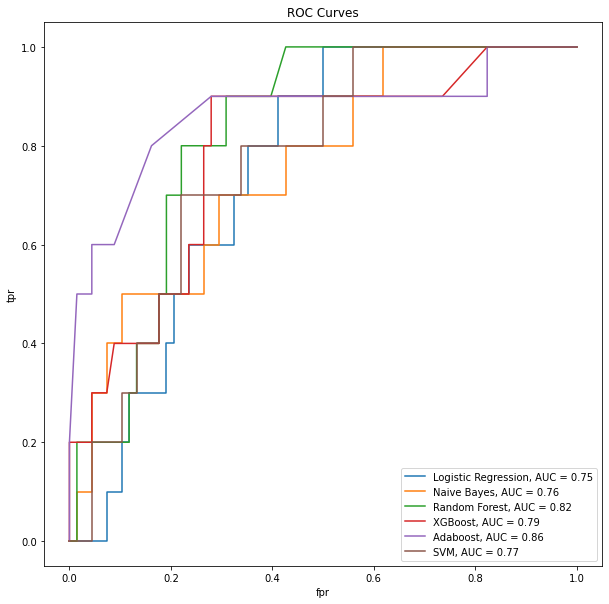

In [7]:
# stim + resp channels

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, U

Logistic Regression - Number of mislabeled points out of a total 78 points : 10
Naive Bayes - Number of mislabeled points out of a total 78 points : 32
Random Forest - Number of mislabeled points out of a total 78 points : 10
[14:18:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 10
Adaboost - Number of mislabeled points out of a total 78 points : 6
SVM - Number of mislabeled points out of a total 78 points : 10


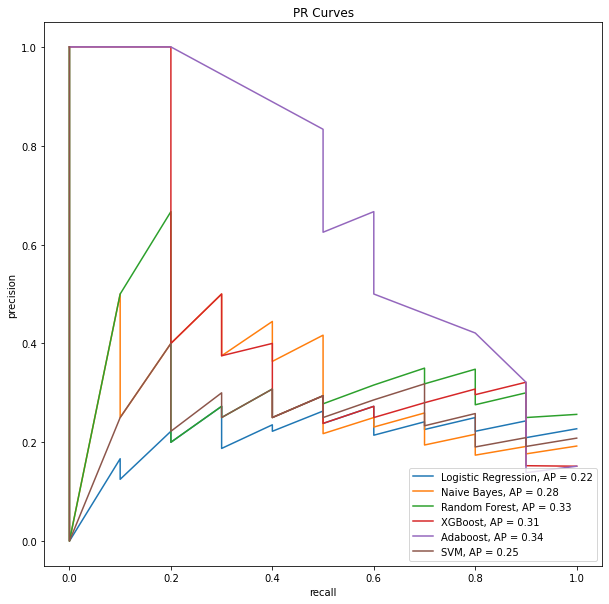

In [8]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

# Random Forest Model

In [9]:
#getting model and stats
from sklearn.metrics import confusion_matrix

max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Random Forest - Number of mislabeled points out of a total 78 points : 10
Optimal roc threshold:  0.13052631578947368
Accuracy:  0.7051282051282052
Sensitivity:  0.8
Specificity:  0.6911764705882353


In [10]:
# getting labels

epilepsy_normal = []
channels_normal = []
correct_normal = []

non_epilepsy = []
channels_non = []
correct_non = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
        
        if y_pred[i] >= optimal_thresh: #seeing if prediction was correct for true positives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Correctly labeled - " + label)
            
        elif y_pred[i] < optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Mislabeled - " + label)
            
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
        
        if y_pred[i] < optimal_thresh: #seeing if prediction was correct for true negatives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Correctly labeled - " + label)            
            
        elif y_pred[i] >= optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Mislabeled - " + label)    
    
    i += 1
    
correct_normal_ordered = [x for _,x in sorted(zip(epilepsy_normal, correct_normal), reverse = True)]
correct_non_ordered = [x for _,x in sorted(zip(non_epilepsy, correct_non), reverse = True)]
            
print("\n")
print("Positive labels")            
print(*correct_normal_ordered, sep = "\n")

print("\n")
print("Negative labels")
print(*correct_non_ordered, sep = "\n")



Positive labels
Correctly labeled - Left fronto-temporal grid
Correctly labeled - left posterior hippocampus
Correctly labeled - Left fronto-temporal grid
Correctly labeled - left basal temporal
Correctly labeled - Right anterior hippocampus
Correctly labeled - left amygdala
Correctly labeled - Right hippocampal depth
Correctly labeled - left amygdala
Correctly labeled - Left inferior posterior frontal depth
Mislabeled - Right amygdala depth


Negative labels
Mislabeled - Right anterior hippocampus
Mislabeled - Left fronto-temporal grid
Mislabeled - Basal temporal posterior-temporal
Mislabeled - Left fronto-temporal grid
Mislabeled - Right medial frontal depth
Mislabeled - Right frontal grid
Mislabeled - Right amygdala
Mislabeled - Left fronto-parietal grid
Mislabeled - Right medial tumor inferior
Mislabeled - Left fronto-temporal grid
Mislabeled - Left fronto-temporal grid
Mislabeled - Left fronto-temporal grid
Mislabeled - left posterior hippocampus
Mislabeled - Right lateral tumor

<AxesSubplot:title={'center':'Random Forest boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

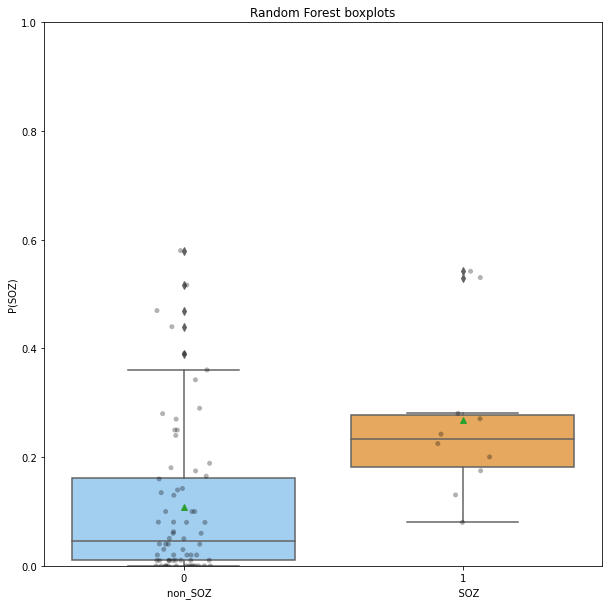

In [11]:
# Plotting boxplot
import seaborn as sns

plt.figure(figsize = (10, 10))
plt.title("Random Forest boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


Most Significant Feature:  N1StimAvg
Least Significant Feature:  SigResp


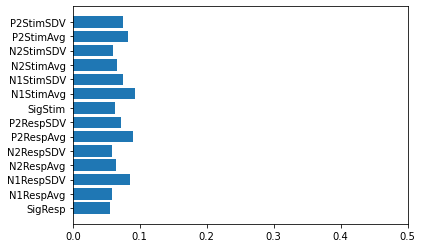

In [12]:
rf.feature_importances_

plt.barh(X_list[1:], rf.feature_importances_)
plt.xlim([0,.5])
print("Most Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(max(rf.feature_importances_))])
print("Least Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(min(rf.feature_importances_))])

## RF - SMOTE

In [13]:
all_positive_patients = pd.read_csv("newDF.csv", sep = ",").reset_index(drop = True)

X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]

Logistic Regression - Number of mislabeled points out of a total 78 points : 25
Naive Bayes - Number of mislabeled points out of a total 78 points : 30


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Number of mislabeled points out of a total 78 points : 12
[14:18:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 12
Adaboost - Number of mislabeled points out of a total 78 points : 12
SVM - Number of mislabeled points out of a total 78 points : 23


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


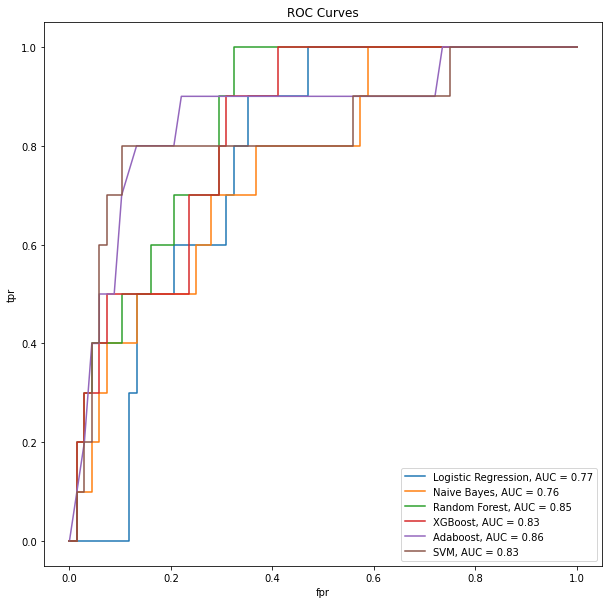

In [14]:
# stim + resp channels

smote = True

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Number of mislabeled points out of a total 78 points : 27
Naive Bayes - Number of mislabeled points out of a total 78 points : 33
Random Forest - Number of mislabeled points out of a total 78 points : 8
[14:18:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 10
Adaboost - Number of mislabeled points out of a total 78 points : 25
SVM - Number of mislabeled points out of a total 78 points : 24


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


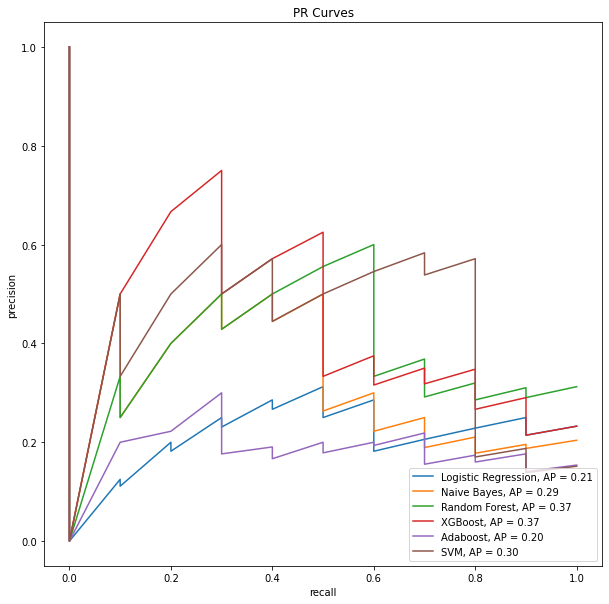

In [15]:
smote = True

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

In [16]:
#getting model and stats
from sklearn.metrics import confusion_matrix

smote = True

max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Random Forest - Number of mislabeled points out of a total 78 points : 10
Optimal roc threshold:  0.18372668579626972
Accuracy:  0.6794871794871795
Sensitivity:  0.9
Specificity:  0.6470588235294118


In [17]:
# getting labels

epilepsy_normal = []
channels_normal = []
correct_normal = []

non_epilepsy = []
channels_non = []
correct_non = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
        
        if y_pred[i] >= optimal_thresh: #seeing if prediction was correct for true positives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Correctly labeled - " + label)
            
        elif y_pred[i] < optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Mislabeled - " + label)
            
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
        
        if y_pred[i] < optimal_thresh: #seeing if prediction was correct for true negatives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Correctly labeled - " + label)            
            
        elif y_pred[i] >= optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Mislabeled - " + label)    
    
    i += 1
    
correct_normal_ordered = [x for _,x in sorted(zip(epilepsy_normal, correct_normal), reverse = True)]
correct_non_ordered = [x for _,x in sorted(zip(non_epilepsy, correct_non), reverse = True)]
            
print("\n")
print("Positive labels")            
print(*correct_normal_ordered, sep = "\n")

print("\n")
print("Negative labels")
print(*correct_non_ordered, sep = "\n")



Positive labels
Correctly labeled - Left fronto-temporal grid
Correctly labeled - left posterior hippocampus
Correctly labeled - Left fronto-temporal grid
Correctly labeled - left basal temporal
Correctly labeled - Right anterior hippocampus
Correctly labeled - left amygdala
Correctly labeled - Left inferior posterior frontal depth
Correctly labeled - left amygdala
Correctly labeled - Right hippocampal depth
Correctly labeled - Right amygdala depth


Negative labels
Mislabeled - Left fronto-temporal grid
Mislabeled - Basal temporal posterior-temporal
Mislabeled - Right medial frontal depth
Mislabeled - Left fronto-temporal grid
Mislabeled - Right frontal grid
Mislabeled - Left frontal
Mislabeled - Right amygdala
Mislabeled - Right orbitofrontal depth
Mislabeled - Right anterior hippocampus
Mislabeled - Left fronto-temporal grid
Mislabeled - left posterior hippocampus
Mislabeled - Left fronto-temporal grid
Mislabeled - Right lateral tumor superior
Mislabeled - Left fronto-temporal gri

<AxesSubplot:title={'center':'Random Forest boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

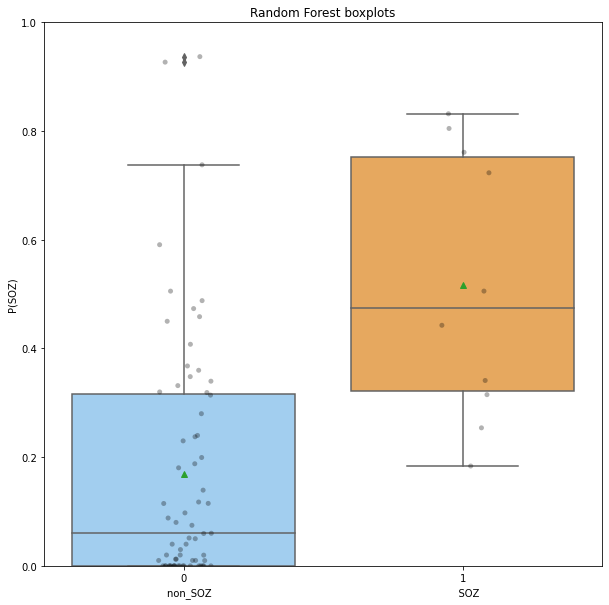

In [18]:
# Plotting boxplot
import seaborn as sns

plt.figure(figsize = (10, 10))
plt.title("Random Forest boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


Most Significant Feature:  P2RespAvg
Least Significant Feature:  SigResp


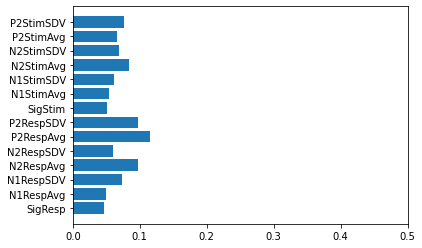

In [19]:
rf.feature_importances_

plt.barh(X_list[1:], rf.feature_importances_)
plt.xlim([0,.5])
print("Most Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(max(rf.feature_importances_))])
print("Least Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(min(rf.feature_importances_))])







## RF - Duplicated Upsampling 


In [20]:
all_positive_patients = pd.read_csv("newDF.csv", sep = ",").reset_index(drop = True)

X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]

Logistic Regression - Number of mislabeled points out of a total 78 points : 27
Naive Bayes - Number of mislabeled points out of a total 78 points : 32


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Number of mislabeled points out of a total 78 points : 10
[14:18:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 10
Adaboost - Number of mislabeled points out of a total 78 points : 19
SVM - Number of mislabeled points out of a total 78 points : 25


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


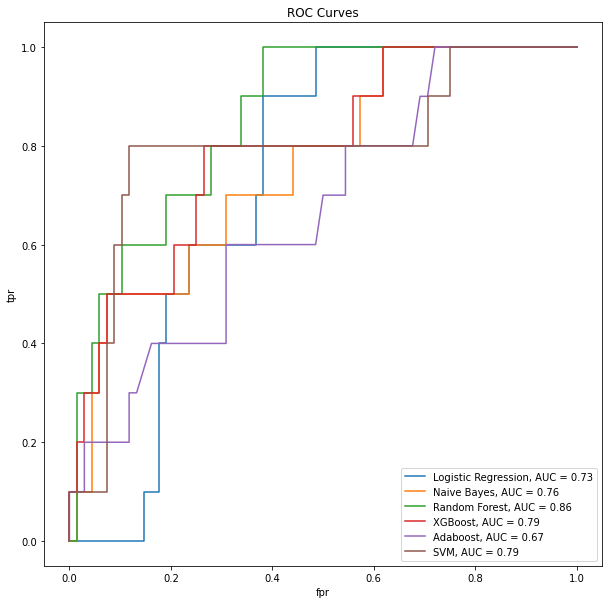

In [21]:
# stim + resp channels

smote = "resample"

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Number of mislabeled points out of a total 78 points : 26
Naive Bayes - Number of mislabeled points out of a total 78 points : 33
Random Forest - Number of mislabeled points out of a total 78 points : 11
[14:18:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 10
Adaboost - Number of mislabeled points out of a total 78 points : 17
SVM - Number of mislabeled points out of a total 78 points : 24


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


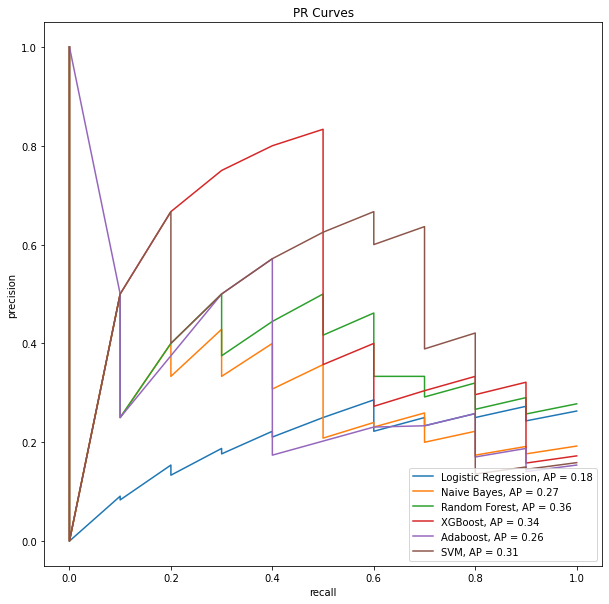

In [22]:
smote = "resample"

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

In [23]:
#getting model and stats
from sklearn.metrics import confusion_matrix

smote = "resample"

max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Random Forest - Number of mislabeled points out of a total 78 points : 10
Optimal roc threshold:  0.12830532212885154
Accuracy:  0.6538461538461539
Sensitivity:  0.9
Specificity:  0.6176470588235294


In [24]:
# getting labels

epilepsy_normal = []
channels_normal = []
correct_normal = []

non_epilepsy = []
channels_non = []
correct_non = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
        
        if y_pred[i] > (optimal_thresh + 0.01): #seeing if prediction was correct for true positives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Correctly labeled - " + label)
            
        elif y_pred[i] < (optimal_thresh + 0.01):
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Mislabeled - " + label)
            
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
        
        if y_pred[i] < optimal_thresh: #seeing if prediction was correct for true negatives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Correctly labeled - " + label)            
            
        elif y_pred[i] > optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Mislabeled - " + label)    
    
    i += 1
    
correct_normal_ordered = [x for _,x in sorted(zip(epilepsy_normal, correct_normal), reverse = True)]
correct_non_ordered = [x for _,x in sorted(zip(non_epilepsy, correct_non), reverse = True)]
            
print("\n")
print("Positive labels")            
print(*correct_normal_ordered, sep = "\n")

print("\n")
print("Negative labels")
print(*correct_non_ordered, sep = "\n")



Positive labels
Correctly labeled - Left fronto-temporal grid
Correctly labeled - left posterior hippocampus
Correctly labeled - left basal temporal
Correctly labeled - Left fronto-temporal grid
Correctly labeled - left amygdala
Correctly labeled - Right anterior hippocampus
Correctly labeled - Left inferior posterior frontal depth
Correctly labeled - left amygdala
Correctly labeled - Right hippocampal depth
Mislabeled - Right amygdala depth


Negative labels
Mislabeled - Left fronto-temporal grid
Mislabeled - Basal temporal posterior-temporal
Mislabeled - Right medial frontal depth
Mislabeled - Left fronto-temporal grid
Mislabeled - Right amygdala
Mislabeled - Right anterior hippocampus
Mislabeled - Left fronto-temporal grid
Mislabeled - Left fronto-temporal grid
Mislabeled - left posterior hippocampus
Mislabeled - Right frontal grid
Mislabeled - Right medial tumor inferior
Mislabeled - Right orbitofrontal depth
Mislabeled - right posterior hippocampus
Mislabeled - left posterior hi

<AxesSubplot:title={'center':'Random Forest boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

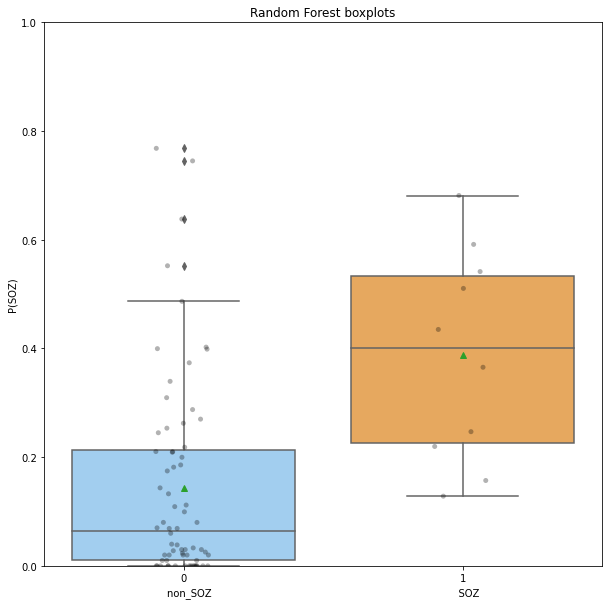

In [25]:
# Plotting boxplot
import seaborn as sns

plt.figure(figsize = (10, 10))
plt.title("Random Forest boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


Most Significant Feature:  P2RespSDV
Least Significant Feature:  N1StimSDV


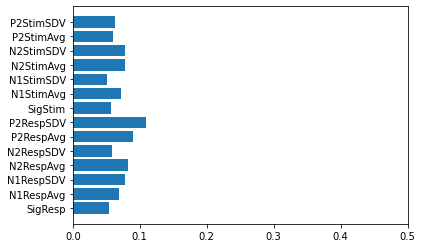

In [26]:
rf.feature_importances_

plt.barh(X_list[1:], rf.feature_importances_)
plt.xlim([0,.5])
print("Most Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(max(rf.feature_importances_))])
print("Least Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(min(rf.feature_importances_))])

## RF - new network features, no upsampling

In [27]:
all_positive_patients = pd.read_csv("networkfeatures1.csv", sep = ',').reset_index(drop = True)

print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()

0.0    259
1.0     41
Name: outcome, dtype: int64


,Unnamed: 0,Channels,outcome,SigResp,SigStim,N1RespAvg,N1RespSDV,N2RespAvg,N2RespSDV,P2RespAvg,...,N1StimAvg,N1StimSDV,N2StimAvg,N2StimSDV,P2StimAvg,P2StimSDV,InDegree,OutDegree,EV,Closeness
0,0,LA9_LA10,0.0,0.000000,0.250000,1.530459,1.134169,2.040546,1.369091,1.304096,...,7.178516,10.790559,6.536859,6.383906,5.785279,7.331337,0.000000,0.222222,5.165334e-14,0.000000
1,1,LAH1_LAH2,1.0,0.076923,0.250000,7.062089,20.678040,3.320937,2.795194,2.178348,...,7.883750,16.334814,4.921208,3.029861,2.352152,1.803711,0.074074,0.222222,7.960607e-04,0.177778
2,2,LAH8_LAH9,0.0,0.307692,0.125000,4.032683,2.995624,3.450575,2.883998,2.376435,...,2.505806,2.164878,2.190308,1.489418,2.033410,2.112725,0.296296,0.111111,1.590588e-01,0.484848
3,3,LPH1_LPH2,0.0,0.115385,0.333333,6.522655,17.219698,3.369771,3.506524,2.281413,...,6.505212,8.264811,4.630948,3.574869,4.187831,3.626223,0.111111,0.296296,4.743270e-03,0.222222
4,4,LPH7_LPH8,0.0,0.307692,0.083333,7.304854,10.728727,4.610356,4.159990,3.468193,...,2.823084,2.925869,1.606341,1.075715,1.461462,1.012732,0.296296,0.074074,1.857524e-01,0.484848


In [28]:
X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV", "InDegree",
          "OutDegree", "EV", "Closeness"]

Logistic Regression - Number of mislabeled points out of a total 75 points : 10
Naive Bayes - Number of mislabeled points out of a total 75 points : 28


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Number of mislabeled points out of a total 75 points : 9
[14:18:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 75 points : 11
Adaboost - Number of mislabeled points out of a total 75 points : 11
SVM - Number of mislabeled points out of a total 75 points : 10


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


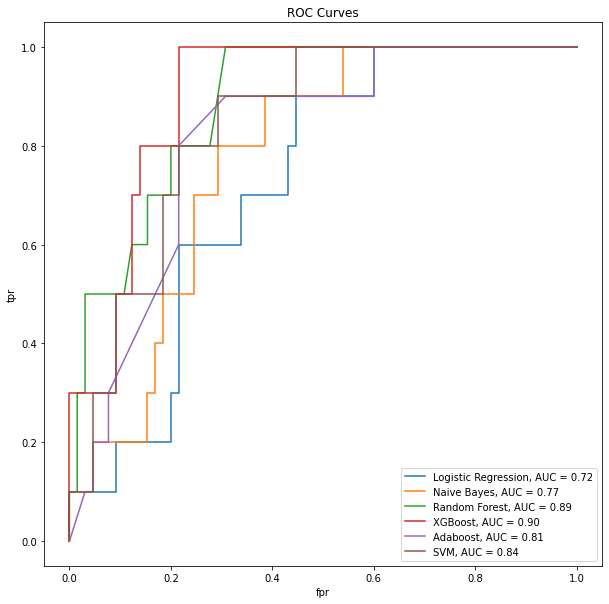

In [29]:
# stim + resp channels

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, U

Logistic Regression - Number of mislabeled points out of a total 75 points : 10
Naive Bayes - Number of mislabeled points out of a total 75 points : 28
Random Forest - Number of mislabeled points out of a total 75 points : 9
[14:18:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 75 points : 11
Adaboost - Number of mislabeled points out of a total 75 points : 11
SVM - Number of mislabeled points out of a total 75 points : 10


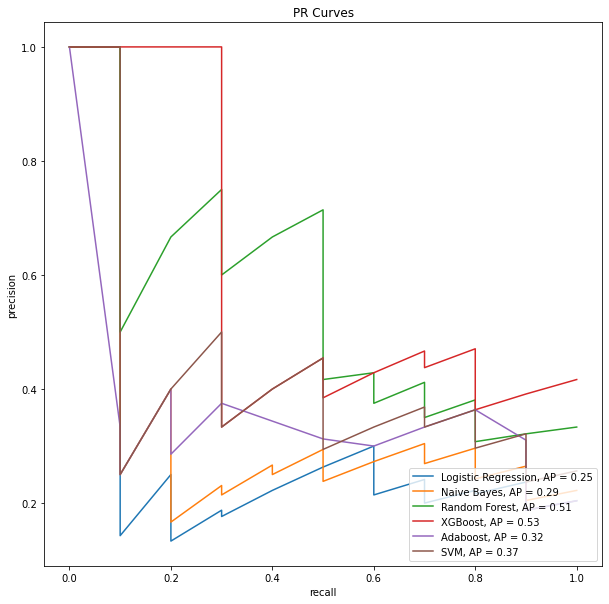

In [30]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

In [31]:
#getting model and stats
from sklearn.metrics import confusion_matrix

max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Random Forest - Number of mislabeled points out of a total 75 points : 9
Optimal roc threshold:  0.17
Accuracy:  0.7333333333333333
Sensitivity:  0.9
Specificity:  0.7076923076923077


In [32]:
# getting labels

epilepsy_normal = []
channels_normal = []
correct_normal = []

non_epilepsy = []
channels_non = []
correct_non = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
        
        if y_pred[i] >= optimal_thresh: #seeing if prediction was correct for true positives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Correctly labeled - " + label)
            
        elif y_pred[i] < optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Mislabeled - " + label)
            
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
        
        if y_pred[i] < optimal_thresh: #seeing if prediction was correct for true negatives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Correctly labeled - " + label)            
            
        elif y_pred[i] >= optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Mislabeled - " + label)    
    
    i += 1
    
correct_normal_ordered = [x for _,x in sorted(zip(epilepsy_normal, correct_normal), reverse = True)]
correct_non_ordered = [x for _,x in sorted(zip(non_epilepsy, correct_non), reverse = True)]
            
print("\n")
print("Positive labels")            
print(*correct_normal_ordered, sep = "\n")

print("\n")
print("Negative labels")
print(*correct_non_ordered, sep = "\n")



Positive labels
Correctly labeled - left anterior hippocampus
Correctly labeled - Left inferior posterior frontal depth
Correctly labeled - left posterior hippocampus
Correctly labeled - Left orbitofrontal depth
Correctly labeled - Right amygdala depth
Correctly labeled - Left inferior frontal
Correctly labeled - right posterior hippocampus
Correctly labeled - left basal temporal
Correctly labeled - left amygdala
Correctly labeled - Right anterior temporal inferior


Negative labels
Mislabeled - Basal temporal posterior-temporal
Mislabeled - Left amygdala depth
Mislabeled - left posterior hippocampus
Mislabeled - Right frontal grid
Mislabeled - Right anterior hippocampus
Mislabeled - left amygdala
Mislabeled - Left nodule E
Mislabeled - Left fronto-temporal grid
Mislabeled - Left fronto-temporal grid
Mislabeled - right posterior hippocampus
Mislabeled - Right medial tumor inferior
Mislabeled - Left fronto-temporal grid
Mislabeled - Left fronto-temporal grid
Mislabeled - Left fronto-p

<AxesSubplot:title={'center':'Random Forest boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

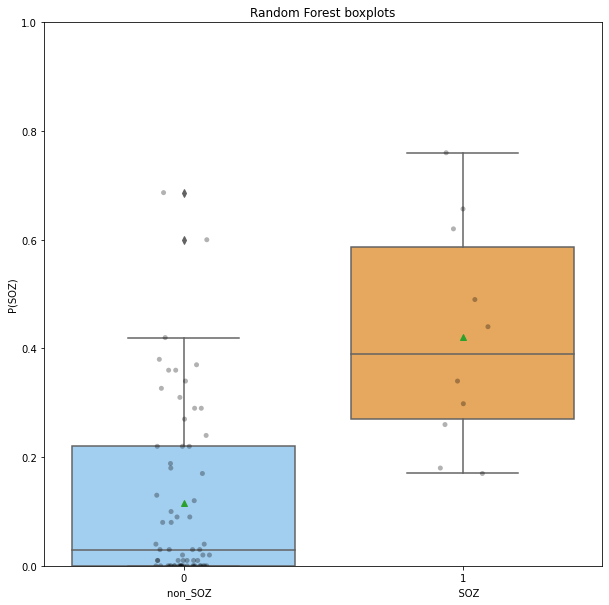

In [33]:
# Plotting boxplot
import seaborn as sns

plt.figure(figsize = (10, 10))
plt.title("Random Forest boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


Most Significant Feature:  N1RespSDV
Least Significant Feature:  OutDegree


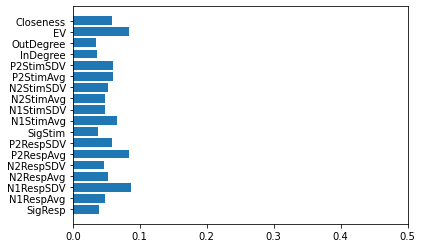

In [34]:
rf.feature_importances_

plt.barh(X_list[1:], rf.feature_importances_)
plt.xlim([0,.5])
print("Most Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(max(rf.feature_importances_))])
print("Least Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(min(rf.feature_importances_))])

## Network features + SMOTE

In [35]:
all_positive_patients = pd.read_csv("networkfeatures1.csv", sep = ',').reset_index(drop = True)

In [36]:
X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV", "InDegree",
          "OutDegree", "EV", "Closeness"]

Logistic Regression - Number of mislabeled points out of a total 75 points : 25
Naive Bayes - Number of mislabeled points out of a total 75 points : 26


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Number of mislabeled points out of a total 75 points : 11
[14:18:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 75 points : 15
Adaboost - Number of mislabeled points out of a total 75 points : 16
SVM - Number of mislabeled points out of a total 75 points : 19


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


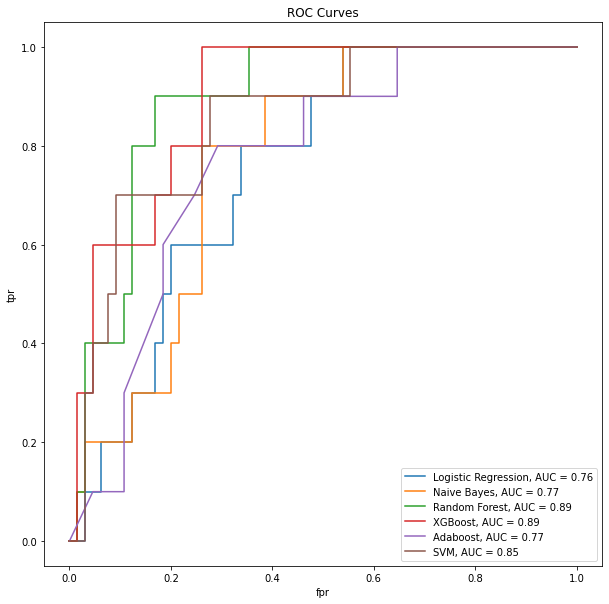

In [37]:
# stim + resp channels

smote = True

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Number of mislabeled points out of a total 75 points : 25
Naive Bayes - Number of mislabeled points out of a total 75 points : 28
Random Forest - Number of mislabeled points out of a total 75 points : 11
[14:18:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 75 points : 10
Adaboost - Number of mislabeled points out of a total 75 points : 23
SVM - Number of mislabeled points out of a total 75 points : 27


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


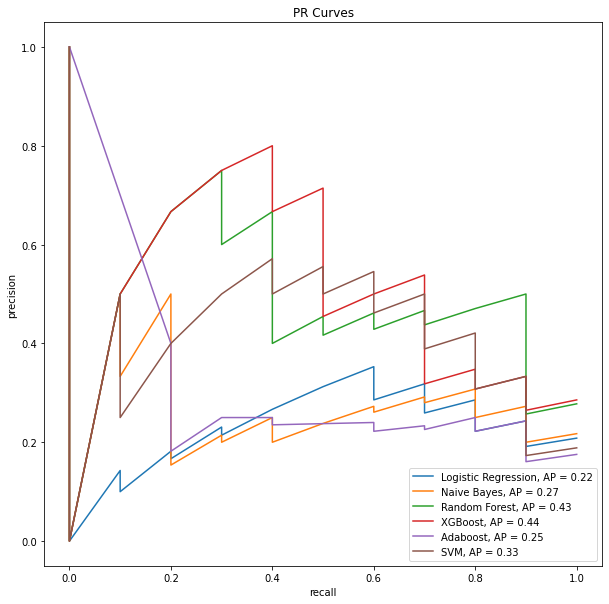

In [38]:
smote = True

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

In [39]:
#getting model and stats
from sklearn.metrics import confusion_matrix

smote = True

max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Random Forest - Number of mislabeled points out of a total 75 points : 11
Optimal roc threshold:  0.43161464993670173
Accuracy:  0.84
Sensitivity:  0.8
Specificity:  0.8461538461538461


In [40]:
# getting labels

epilepsy_normal = []
channels_normal = []
correct_normal = []

non_epilepsy = []
channels_non = []
correct_non = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
        
        if y_pred[i] >= optimal_thresh: #seeing if prediction was correct for true positives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Correctly labeled - " + label)
            
        elif y_pred[i] < optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Mislabeled - " + label)
            
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
        
        if y_pred[i] < optimal_thresh: #seeing if prediction was correct for true negatives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Correctly labeled - " + label)            
            
        elif y_pred[i] >= optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Mislabeled - " + label)    
    
    i += 1
    
correct_normal_ordered = [x for _,x in sorted(zip(epilepsy_normal, correct_normal), reverse = True)]
correct_non_ordered = [x for _,x in sorted(zip(non_epilepsy, correct_non), reverse = True)]
            
print("\n")
print("Positive labels")            
print(*correct_normal_ordered, sep = "\n")

print("\n")
print("Negative labels")
print(*correct_non_ordered, sep = "\n")



Positive labels
Correctly labeled - left posterior hippocampus
Correctly labeled - Left inferior posterior frontal depth
Correctly labeled - left anterior hippocampus
Correctly labeled - Left inferior frontal
Correctly labeled - Left orbitofrontal depth
Correctly labeled - Right anterior temporal inferior
Correctly labeled - Right amygdala depth
Correctly labeled - right posterior hippocampus
Correctly labeled - left amygdala
Mislabeled - left basal temporal


Negative labels
Mislabeled - Basal temporal posterior-temporal
Mislabeled - Left nodule E
Mislabeled - Left amygdala depth
Mislabeled - Left fronto-temporal grid
Mislabeled - Left fronto-temporal grid
Mislabeled - left posterior hippocampus
Mislabeled - left amygdala
Mislabeled - Left fronto-temporal grid
Mislabeled - Left fronto-temporal grid
Mislabeled - Left fronto-temporal grid
Correctly labeled - Right frontal grid
Correctly labeled - right posterior hippocampus
Correctly labeled - Left fronto-temporal grid
Correctly label

<AxesSubplot:title={'center':'Random Forest boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

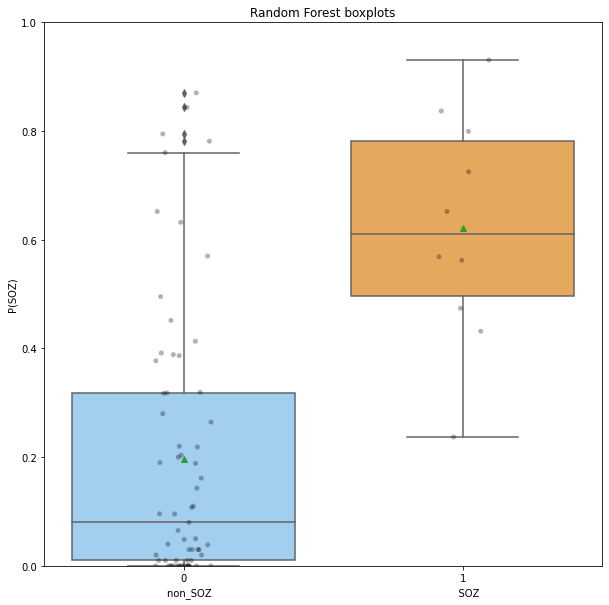

In [41]:

# Plotting boxplot
import seaborn as sns

plt.figure(figsize = (10, 10))
plt.title("Random Forest boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


Most Significant Feature:  P2RespAvg
Least Significant Feature:  OutDegree


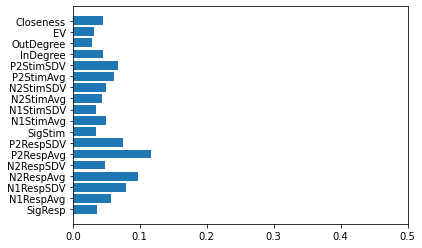

In [42]:
rf.feature_importances_

plt.barh(X_list[1:], rf.feature_importances_)
plt.xlim([0,.5])
print("Most Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(max(rf.feature_importances_))])
print("Least Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(min(rf.feature_importances_))])

# RF + Network Features + Random Upsampling

In [43]:
all_positive_patients = pd.read_csv("networkfeatures1.csv", sep = ',').reset_index(drop = True)

In [44]:
X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV", "InDegree",
          "OutDegree", "EV", "Closeness"]

Logistic Regression - Number of mislabeled points out of a total 75 points : 23
Naive Bayes - Number of mislabeled points out of a total 75 points : 30


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Number of mislabeled points out of a total 75 points : 11
[14:18:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 75 points : 11
Adaboost - Number of mislabeled points out of a total 75 points : 18
SVM - Number of mislabeled points out of a total 75 points : 21


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


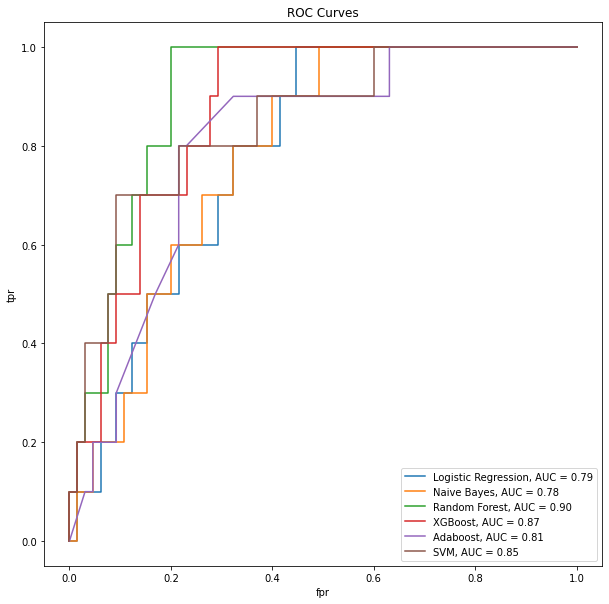

In [45]:
# stim + resp channels

smote = "resample"

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Number of mislabeled points out of a total 75 points : 26
Naive Bayes - Number of mislabeled points out of a total 75 points : 28
Random Forest - Number of mislabeled points out of a total 75 points : 9
[14:18:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 75 points : 14
Adaboost - Number of mislabeled points out of a total 75 points : 21
SVM - Number of mislabeled points out of a total 75 points : 25


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


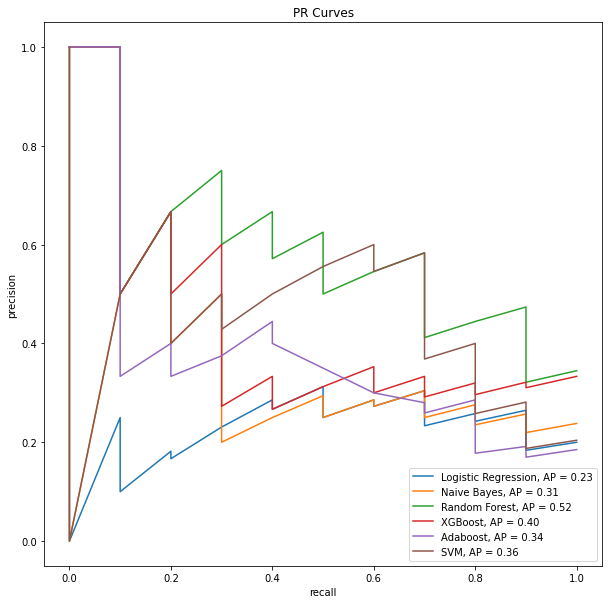

In [46]:
smote = "resample"

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

In [47]:
#getting model and stats
from sklearn.metrics import confusion_matrix

smote = "resample"

max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Random Forest - Number of mislabeled points out of a total 75 points : 11
Optimal roc threshold:  0.3842707521687185
Accuracy:  0.88
Sensitivity:  0.8
Specificity:  0.8923076923076924


In [48]:
# getting labels

epilepsy_normal = []
channels_normal = []
correct_normal = []

non_epilepsy = []
channels_non = []
correct_non = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
        
        if y_pred[i] >= optimal_thresh: #seeing if prediction was correct for true positives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Correctly labeled - " + label)
            
        elif y_pred[i] < optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_normal.append("Mislabeled - " + label)
            
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
        
        if y_pred[i] < optimal_thresh: #seeing if prediction was correct for true negatives
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Correctly labeled - " + label)            
            
        elif y_pred[i] >= optimal_thresh:
            
            no_digits = ''.join(i for i in test_channels[i] if not i.isdigit()) #dropping digits from channel name
            channel_split = no_digits.split("_")
            for key in node_location.keys():
                if (channel_split[0] == key) | (channel_split[1] == key): # if channel matches node label, label it
                    label = node_location[key]
            correct_non.append("Mislabeled - " + label)    
    
    i += 1
    
correct_normal_ordered = [x for _,x in sorted(zip(epilepsy_normal, correct_normal), reverse = True)]
correct_non_ordered = [x for _,x in sorted(zip(non_epilepsy, correct_non), reverse = True)]
            
print("\n")
print("Positive labels")            
print(*correct_normal_ordered, sep = "\n")

print("\n")
print("Negative labels")
print(*correct_non_ordered, sep = "\n")



Positive labels
Correctly labeled - left posterior hippocampus
Correctly labeled - Left inferior posterior frontal depth
Correctly labeled - left anterior hippocampus
Correctly labeled - Left inferior frontal
Correctly labeled - Left orbitofrontal depth
Correctly labeled - Right anterior temporal inferior
Correctly labeled - left amygdala
Correctly labeled - right posterior hippocampus
Correctly labeled - Right amygdala depth
Mislabeled - left basal temporal


Negative labels
Mislabeled - Basal temporal posterior-temporal
Mislabeled - Left amygdala depth
Mislabeled - Left fronto-temporal grid
Mislabeled - Left fronto-temporal grid
Mislabeled - left amygdala
Mislabeled - Left nodule E
Mislabeled - Left fronto-temporal grid
Correctly labeled - right posterior hippocampus
Correctly labeled - Right frontal grid
Correctly labeled - Left amygdala
Correctly labeled - left posterior hippocampus
Correctly labeled - Right medial tumor inferior
Correctly labeled - Left superior frontal depth
Co

<AxesSubplot:title={'center':'Random Forest boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

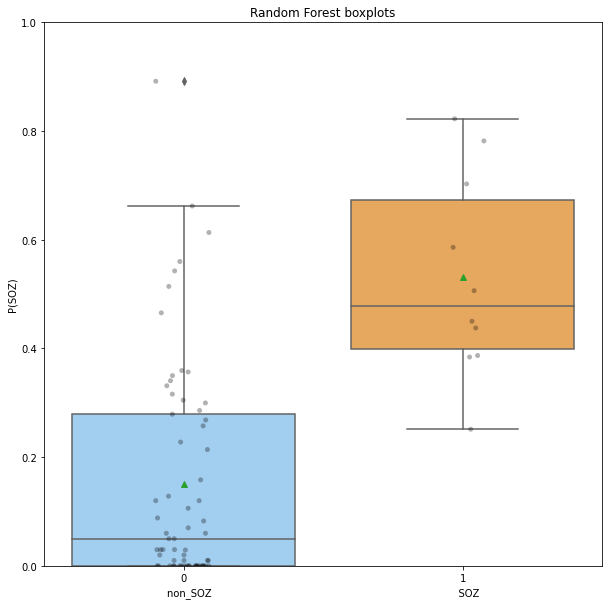

In [49]:
# Plotting boxplot
import seaborn as sns

plt.figure(figsize = (10, 10))
plt.title("Random Forest boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


Most Significant Feature:  P2RespAvg
Least Significant Feature:  SigResp


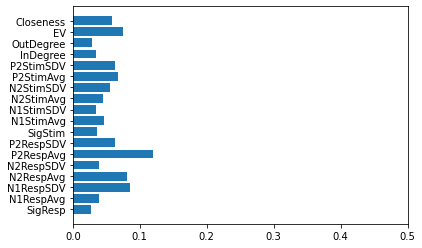

In [50]:
rf.feature_importances_

plt.barh(X_list[1:], rf.feature_importances_)
plt.xlim([0,.5])
print("Most Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(max(rf.feature_importances_))])
print("Least Significant Feature: ", X_list[1:][list(rf.feature_importances_).index(min(rf.feature_importances_))])

# Training and testing by patients with crossvalidation

In [51]:
all_positive_patients = pd.read_csv("newDF_patientlabels.csv", sep = ',').reset_index(drop = True)
all_positive_patients["Channels"] = 0 #filling channels with null since smote doesn't preserve channel names

print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()

0.0    259
1.0     41
Name: outcome, dtype: int64


,Unnamed: 0,Channels,outcome,SigResp,SigStim,N1RespAvg,N1RespSDV,N2RespAvg,N2RespSDV,P2RespAvg,...,N1StimSDV,N2StimAvg,N2StimSDV,P2StimAvg,P2StimSDV,patient,InDegree,OutDegree,EV,Closeness
0,0,0,0.0,0.000000,0.250000,1.530459,1.134169,2.040546,1.369091,1.304096,...,10.790559,6.536859,6.383906,5.785279,7.331337,30,0.000000,0.222222,5.165334e-14,0.000000
1,1,0,1.0,0.076923,0.250000,7.062089,20.678040,3.320937,2.795194,2.178348,...,16.334814,4.921208,3.029861,2.352152,1.803711,30,0.074074,0.222222,7.960607e-04,0.177778
2,2,0,0.0,0.307692,0.125000,4.032683,2.995624,3.450575,2.883998,2.376435,...,2.164878,2.190308,1.489418,2.033410,2.112725,30,0.296296,0.111111,1.590588e-01,0.484848
3,3,0,0.0,0.115385,0.333333,6.522655,17.219698,3.369771,3.506524,2.281413,...,8.264811,4.630948,3.574869,4.187831,3.626223,30,0.111111,0.296296,4.743270e-03,0.222222
4,4,0,0.0,0.307692,0.083333,7.304854,10.728727,4.610356,4.159990,3.468193,...,2.925869,1.606341,1.075715,1.461462,1.012732,30,0.296296,0.074074,1.857524e-01,0.484848


In [52]:
grouped = all_positive_patients.groupby(all_positive_patients.patient)

patient_list = set(list(all_positive_patients["patient"]))

dfs = []
for patient in patient_list:
    df = grouped.get_group(patient)
    dfs.append([patient, df])
    


In [53]:
from sklearn.model_selection import KFold
